# Application example: scheduling of industrial processes. 

The current form of electricity markets allows for dynamic electricity pricing schemes, which therefore can be exploited by the industry. The accurate DAM price forecasting is a useful tool for manufacturing companies that have a flexible scheduling scheme, offering them a potential reduction of energy costs. The economic benefit originates from the Demand side Management. Industry can adjust its energy consumption by synchronizing production planning with the respected electricity price forecast. Due to the high volatility of the price, accurate forecasts offer big opportunities for minimizing not only electricity costs, but also possible penalty costs from the extensive usage of non-renewable energy sources or Co2 emissions. 

In this section, the mathematical formulation of the application example of scheduling process for an industrial facility is given on a day-ahead scheduling horizon. The energy cost is reflected by integrating the DAM price in which the industry procures energy for covering its needs. A simplified architecture showing the integration of the forecasting tool in the optimization process is depicted in the picture above. The forecasted DAM price is given as an input to the optimization problem for determining the optimal schedule. The solution is then implemented in the industrial facility with respect to the operational constraints. Finally, for the calculation of the real costs the actual DAM price is considered.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
%load_ext autoreload
%autoreload all
from helper import *
from time_analysis import *
from __init__ import root_dir, data_path
plt.rcParams["figure.figsize"] = (5,3)

import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
# changing the files' path
book1=pd.read_csv(os.path.join(data_path,'clean\Book1.csv'),header=None)*0.000001#Load in MWh
book2=pd.read_csv(os.path.join(data_path,'clean\Book2.csv'),header=None)*0.000001#Load in MWh
price_a = pd.read_csv(os.path.join(data_path,'clean\data.csv'),delimiter=';',decimal=",",header=None).astype(float)
price_f = pd.read_csv(os.path.join(data_path,'clean\data_forecasted.csv'),delimiter=';',decimal=",",header=None).astype(float)
dfemi = pd.read_csv(os.path.join(data_path,'clean\data_Total_CO2_emissions.csv'),delimiter=';',decimal=",",header=None).astype(float)
dfren = pd.read_csv(os.path.join(data_path,'clean\data_Renew_perc.csv'),delimiter=';',decimal=",",header=None).astype(float)



def read_txt(file):
    df=pd.read_csv(file,header=None)
    return df
df=read_txt(os.path.join(data_path,'clean\output_forecast.txt'))
dfa=read_txt(os.path.join(data_path,'clean\output_actua.txt'))
dfi=read_txt(os.path.join(data_path,'clean\output_for_ind.txt'))
dfai=read_txt(os.path.join(data_path,'clean\output_actua_ind.txt'))


df0=df.T
df0a=dfa.T
df0i=dfi.T
df0ai=dfai.T


In [132]:
dfren = pd.read_csv("test1.csv")
create_quarterly_data2(dfren["Renew_perc"],"Renew_perc")
create_quarterly_data2(dfren["Total_CO2_emissions"],"CO2_emissions")

In [122]:
def plots(price,df0,machine,book,name,dfemi,dfren):
    val=[]
    total=0
    on=[]
    for i in price.index:
        value=0
        flag=0
        ind=df0[df0[machine]==i].index#find the index of the load
        x=book.iloc[ind][0]#find the load
        x = np.asarray(x, dtype='float64')
        p=price.loc[i][0]#find the electricity price for that quarter
        p = np.asarray(p, dtype='float64')
        if np.isnan(x*p)==False:
            value=x*p
            value=value.item()
            flag=1
        val.append(value)
        on.append(flag*50)
        total+=value
    print("Total energy cost",total/4)
    plt.plot(val,label="Energy cost")
    plt.title("Energy cost with the "+name)
    plt.show()
    plt.title("Electricity price and activation of the engine"+name)
    plt.plot(price,label="Electricity price")
    plt.plot(dfemi*0.2,label="CO2 emissions")
    plt.plot(dfren*100,label="Renewable percentage")
    plt.plot(on,label="Activation of the engine")
    plt.legend()
    plt.show()

def plots_normal(price_a,book1):
    val=[]
    total=0
    on=[]
    for i in price_a.index:
        value=0
        flag=0
        if i>24 and i<book1.index.max()+24:
            x=book1.iloc[i-24][0]#find the load at after 6am
            x = np.asarray(x, dtype='float64')
        
            p=price_a.loc[i][0]#find the value for that quarter
            p = np.asarray(p, dtype='float64')
            value=x*p
            flag=1
        val.append(value)
        on.append(flag*50)
        total+=value

    print("Total energy cost",total)
    plt.plot(val,label="Energy cost")
    plt.title("Energy cost")
    plt.show()
    plt.title("Electricity price and activation of the engine")
    plt.plot(price_a,label="Electricity price")
    plt.plot(on)
    plt.legend()
    plt.show()


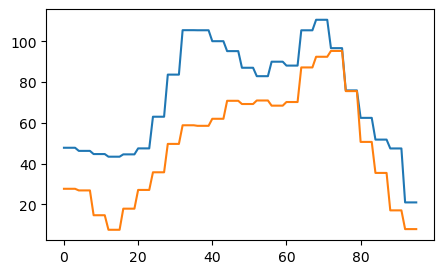

In [124]:
plt.plot(price_a,label="Electricity price")
plt.plot(price_f,label="Electricity price")
plt.show()

Total energy cost 99702.40759700748


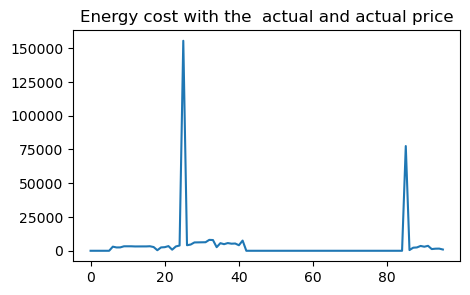

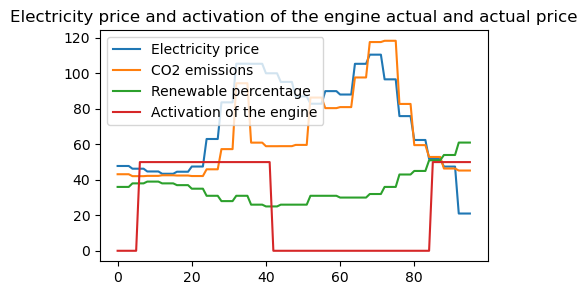

Total energy cost 47969.9148845725


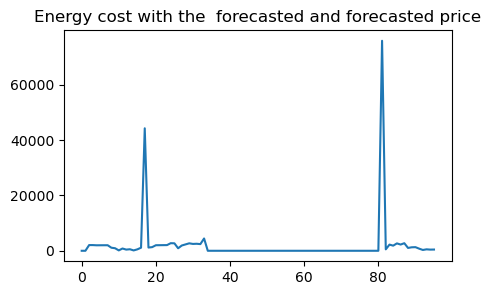

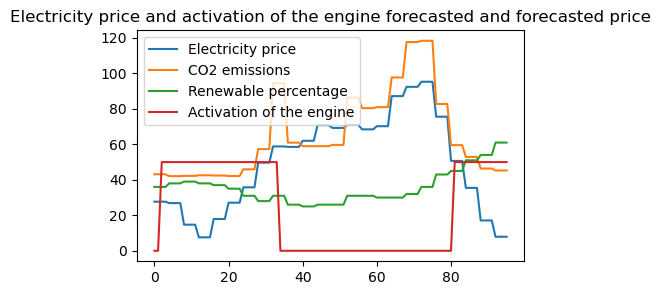

Total energy cost 55863.5868475


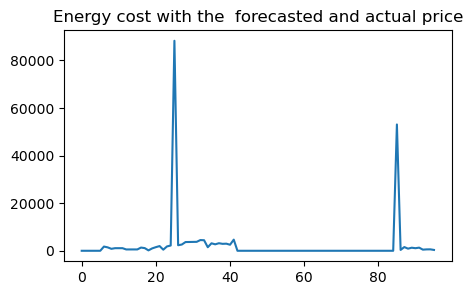

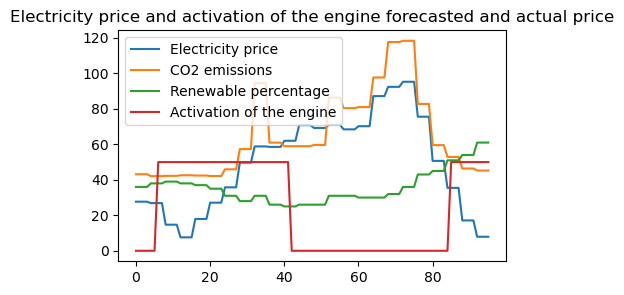

In [123]:
plots(price_a,df0a,1,book1," actual and actual price",dfemi,dfren)
plots(price_f,df0,1,book1," forecasted and forecasted price",dfemi,dfren)
plots(price_f,df0a,1,book1," forecasted and actual price",dfemi,dfren)

In [115]:
plots(price_a,df0ai,1,book1,"actual and actual price")
plots(price_f,df0i,1,book1,"forecasted and forecasted price")
plots(price_a,df0ai,1,book1,"forecasted and actual price")

TypeError: plots() missing 2 required positional arguments: 'dfemi' and 'dfren'

Total energy cost 690906.8576761002


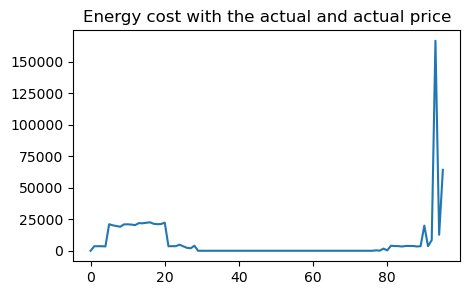

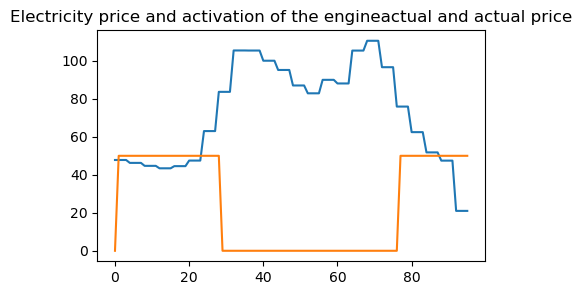

Total energy cost 271175.20797397


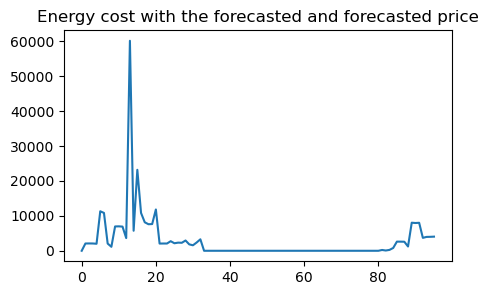

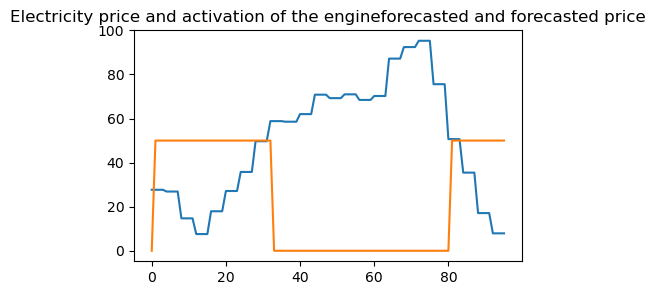

Total energy cost 690906.8576761002


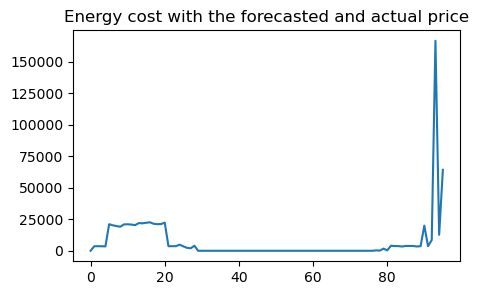

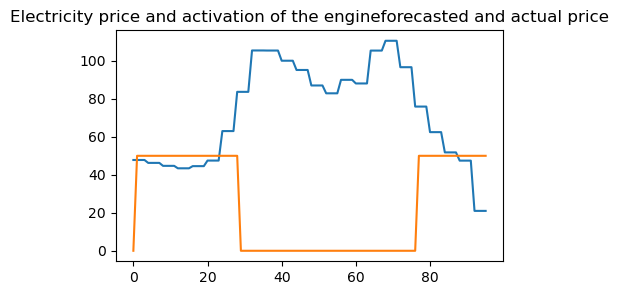

In [99]:
plots(price_a,df0ai,1,book2,"actual and actual price")
plots(price_f,df0i,1,book2,"forecasted and forecasted price")
plots(price_a,df0ai,1,book2,"forecasted and actual price")

Total energy cost 458096.05031053995


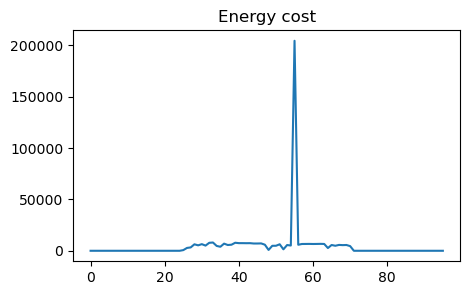

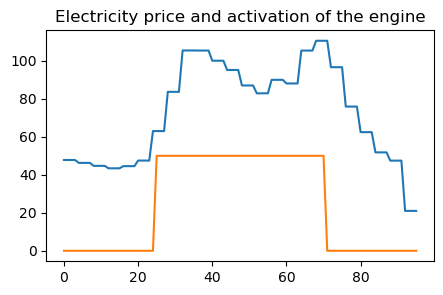

In [87]:


plots_normal(price_a,book1)

Total energy cost 1126051.0423398796


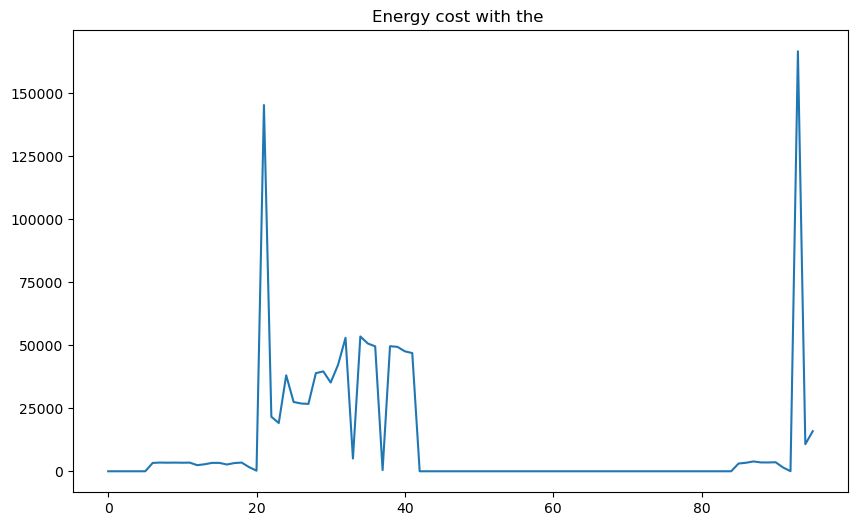

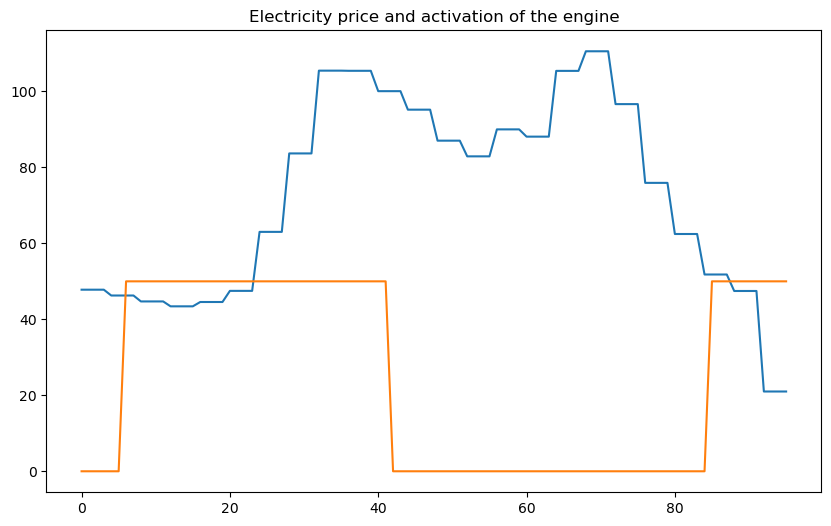

In [79]:
plots(price_a,df0a,1,book2)

Total energy cost 1156386.37733415


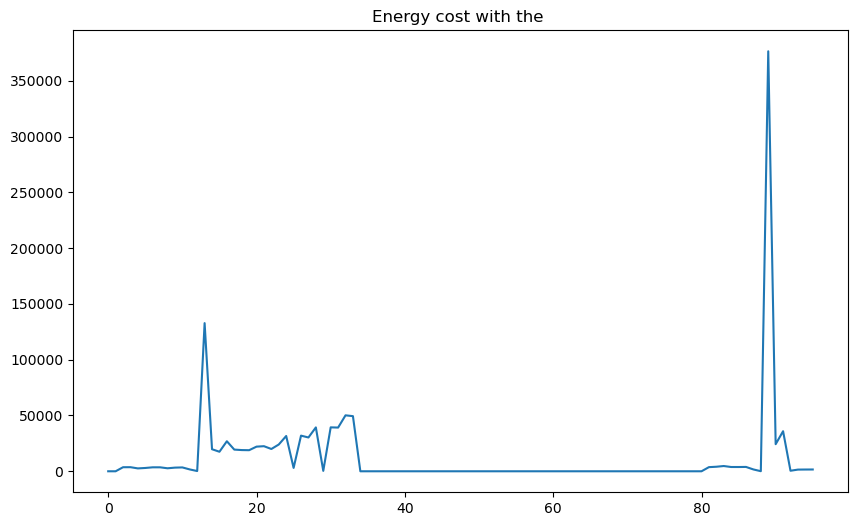

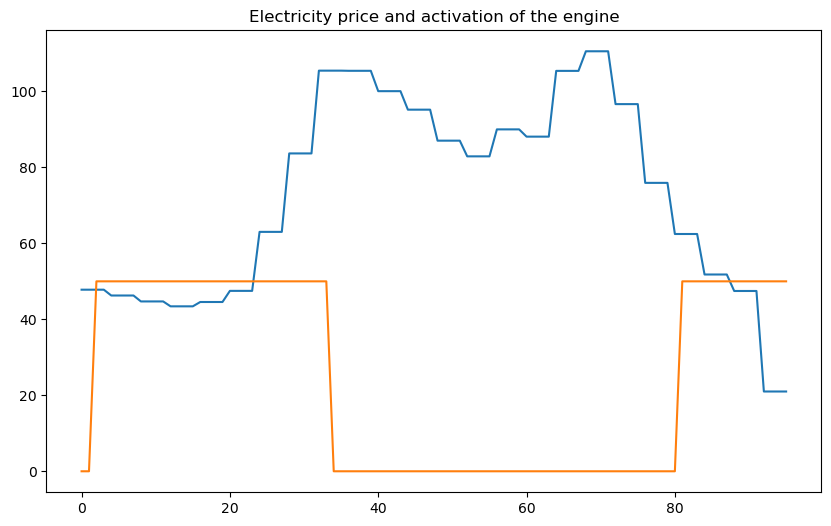

In [77]:
plots(price_a,df0,1,book2)


Total energy cost 488631.08770764


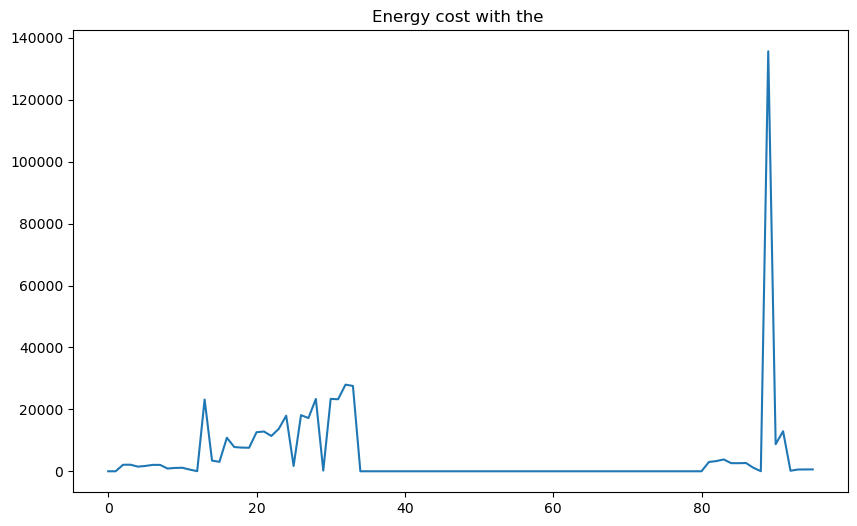

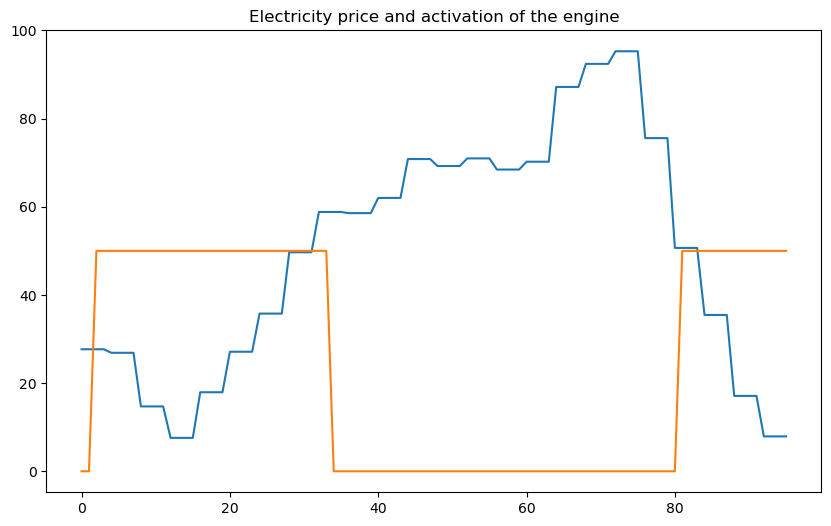

In [78]:
plots(price_f,df0,1,book2)
